## Notebook for experimenting with Dynamic Programming algorithm

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean
import os

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
def parseParamsFromName(fileName):
    split = fileName.split("_")
    if len(split) is not 3 and len(split) is not 4:
        raise ValueError('Unexpected fileName: ' + fileName)
        
    if len(split) is 3:
        return split[0], split[1], split[2], 1
    else:
        return split[0], split[1], split[2], split[3]

In [3]:
def prepareDFCols(dirName, fileName):
    file_df = pd.read_csv(dirName + fileName)
    
    weightDist, priceWCorel, knapsackKapRatio, k = parseParamsFromName(fileName[:-4])
    
    file_df = file_df.assign(w_dist=weightDist)
    file_df = file_df.assign(c_w_corr=priceWCorel)
    file_df = file_df.assign(c_w_ratio=knapsackKapRatio)
    file_df = file_df.assign(k=k)
    
    return file_df

In [4]:
# load data from folder, create important columns and concat all files into 1 df
def loadDF(dirName):
    df = None
    
    for fileName in os.listdir(dirName):
        if df is None:
            df = prepareDFCols(dirName, fileName)
        else:
            df = pd.concat([df, prepareDFCols(dirName, fileName)], ignore_index=True)

    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [5]:
# definice pouzitelnych promennych
ROOT_FOLDER_NAME = './Output/'
params_w = ['bal', 'light', 'heavy']
params_c = ['uni', 'corr', 'strong']
params_m = {
    0.01: '001',
    0.25: '025',
    0.5: '05',
    0.8: '08',
    1: '1'
}

greedy = 'Greedy'

In [6]:
# ziskani pozadovanych dat
df = loadDF(ROOT_FOLDER_NAME + greedy + '/')

display(df.head())

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Error,w_dist,c_w_corr,c_w_ratio,k
0,1,20,0.0,0,0.0,bal,corr,001,1
1,2,20,0.0,0,0.0,bal,corr,001,1
2,3,20,0.0,0,0.0,bal,corr,001,1
3,4,20,0.0,0,NaN,bal,corr,001,1
4,5,20,0.0,0,0.0,bal,corr,001,1


In [7]:
# load results.csv
res = pd.read_csv('results.csv')
res = res[res['AlgoName'] == greedy]
for index, row in res.iterrows():
    weightDist, priceWCorel, knapsackKapRatio, k = parseParamsFromName(row['FileName'])
    res.loc[index, 'w_dist'] = weightDist
    res.loc[index, 'c_w_corr'] = priceWCorel
    res.loc[index, 'c_w_ratio'] = knapsackKapRatio
    res.loc[index, 'k'] = k
    
display(res.head())

,FileName,AlgoName,CpuTime,Date,w_dist,c_w_corr,c_w_ratio,k
216,bal_uni_001,Greedy,0.093750,2020-11-17,bal,uni,001,1
217,light_strong_08,Greedy,0.078125,2020-11-17,light,strong,08,1
218,bal_uni_025_098,Greedy,0.078125,2020-11-17,bal,uni,025,098
219,light_strong_05,Greedy,0.078125,2020-11-17,light,strong,05,1
220,bal_uni_025_099,Greedy,0.046875,2020-11-17,bal,uni,025,099


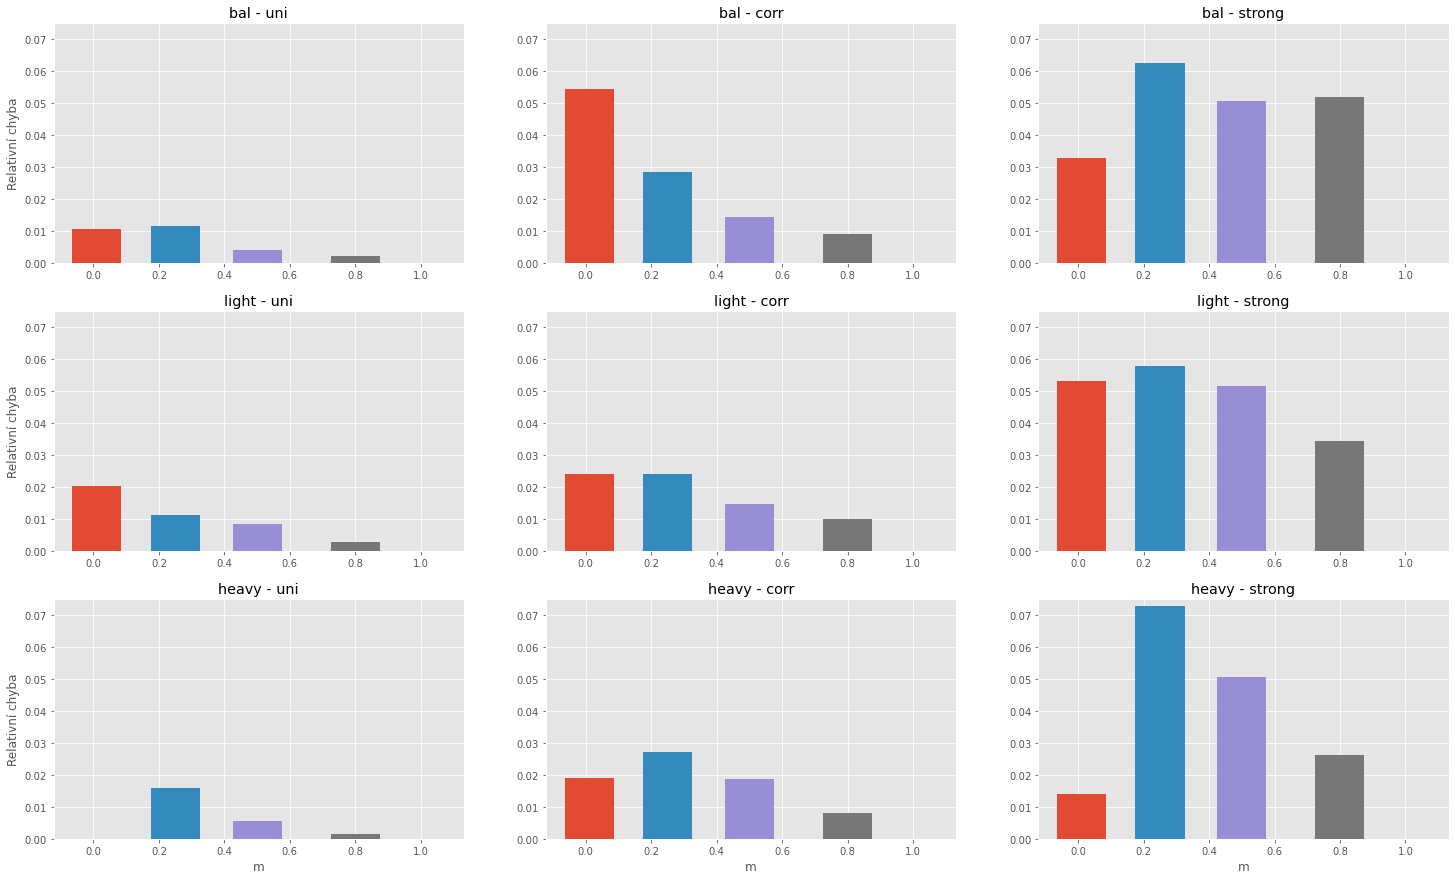

In [8]:
# plot pilot data
columnName = 'Error'
i = 331
plt.figure(figsize=(25,15))

for w in params_w:
    for c in params_c:
        plt.subplot(i)
        for m in params_m.keys():
            plt.bar(m,
                    df[(df['w_dist'] == w) & (df['c_w_corr'] == c)
                        & (df['c_w_ratio'] == params_m[m]) & (df['k'] == 1)][columnName].mean(),
                    width = 0.15
                   )
        plt.title(w + ' - ' + c)
        if w is params_w[-1]:
            plt.xlabel('m')
        if c is params_c[0]:
            plt.ylabel('Relativní chyba')
        plt.ylim(0, 0.075)
        i += 1

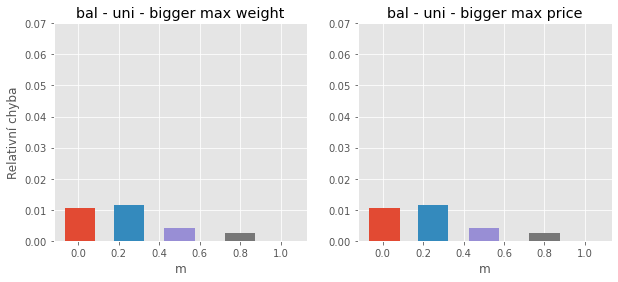

In [9]:
# bigger weight
columnName = 'Error'
i = 121
plt.figure(figsize=(10,4))

plt.subplot(i)
for m in params_m.keys():
    plt.bar(m,
            df[(df['w_dist'] == 'bal') & (df['c_w_corr'] == 'uni')
               & (df['c_w_ratio'] == params_m[m]) & (df['k'] == '099')
              ][columnName].mean(),
            width = 0.15
           )
plt.title('bal - uni - bigger max weight')
plt.xlabel('m')
plt.ylabel('Relativní chyba')
plt.ylim(0, 0.07)
i += 1

# bigger price
plt.subplot(i)
for m in params_m.keys():
    plt.bar(m,
            df[(df['w_dist'] == 'bal') & (df['c_w_corr'] == 'uni')
               & (df['c_w_ratio'] == params_m[m]) & (df['k'] == '098')
              ][columnName].mean(),
            width = 0.15
           )
plt.title('bal - uni - bigger max price')
plt.xlabel('m')
plt.ylim(0, 0.07)
plt.show()

In [10]:
np.linspace(-2, 4, 7)

array([-2., -1.,  0.,  1.,  2.,  3.,  4.])

(0.0, 0.055)

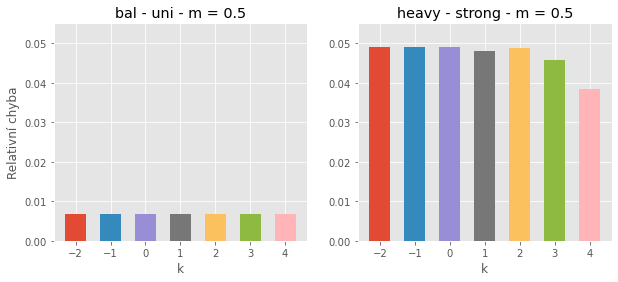

In [11]:
# big experiment - different k values
columnName = 'Error'
params_k = {
    -2: 'm2',
    -1: 'm1',
    0: '0',
    1: '11',
    2: '2',
    3: '3',
    4: '4'
}

i = 121
plt.figure(figsize=(10,4))

# bal - uni
plt.subplot(i)
for k in params_k.keys():
    plt.bar(k,
            df[(df['w_dist'] == 'bal') & (df['c_w_corr'] == 'uni')
                & (df['c_w_ratio'] == '05') & (df['k'] == params_k[k])
               ][columnName].mean(),
            width = 0.6
           )
plt.title('bal - uni - m = 0.5')
plt.xlabel('k')
plt.ylabel('Relativní chyba')
plt.ylim(0, 0.055)
i += 1

# heavy - strong
plt.subplot(i)
for k in params_k.keys():
    plt.bar(k,
            df[(df['w_dist'] == 'heavy') & (df['c_w_corr'] == 'strong')
                & (df['c_w_ratio'] == '05') & (df['k'] == params_k[k])
               ][columnName].mean(),
            width = 0.6
           )
plt.title('heavy - strong - m = 0.5')
plt.xlabel('k')
plt.ylim(0, 0.055)